# Visualización de datos

Semana Tec

Profesores: José Ignacio Treviño / Luz Eunice Angeles

## Librerías de visualización de datos

* **Matplotlib** es la librería más utilizada para crear gráficos en Python. 

  * Está basada en la graficación de Matlab.
  * Permite agregar elementos sobre el gráfico, modificar títulos y leyendas, cambiar colores, entre muchas otras funciones.
  * Como desventaja, para cada detalle que queramos agregar es probable que requiramos agregar una línea de código. 

* **Seaborn** es una librería que está basada en Matplotlib.
  * Tiene la ventaja de que los gráficos son más bonitos por defecto y que utiliza menos líneas de código.
  * Como desventaja, para detalles muy específicos requiere que agreguemos código de matplotlib.

* **Plotly** es una librería para crear gráficos tipo dashboard. 
  * Las visualizaciones creadas con esta librería son interactivas.
  * Como principal desventaja, el código para generar este tipo de gráficos es más complejo que los casos anteriores. 

## Matplotlib

* La utilizamos cuando trabajamos con datos simples.
* Nos sirve para configurar cada elemento del gráfico:
  * Tamaño de la imagen.
  * Tipo de gráfico.
  * Colores y marcas
  * Leyendas y nombres de los ejes.
  * Título.
  * Cuadrícula, ejes primarios y secundarios.
* Para utilizarla, necesitamos imporatarla:
```python
import matplotlib.pyplot as plt
```
* Normalmente usamos el siguiente formato:
```python
# Para configurar el tamaño de la imagen
fig = plt.figure(figsize=(<width, height>)) 
# Con la siguiente instruccion dibujamos un gráfico de línea
plt.plot(<x>, <y>, color = <"color">, label = <"etiqueta">)
# Las siguientes líneas son para agregar elementos del gráfico.
plt.title(<"título">) # Para agregar el título
plt.xlabel(<"título del eje x">) # Etiqueta del eje X
plt.ylabel(<"título del eje y">) # Etiqueta del eje Y
plt.legend(loc='best') # Para mostrar las etiquetas de datos.
plt.grid(<Booleano>) # Para agregar cuadrícula
```


* Vamos a graficar la función $y_1 = 0.5\cdot x$



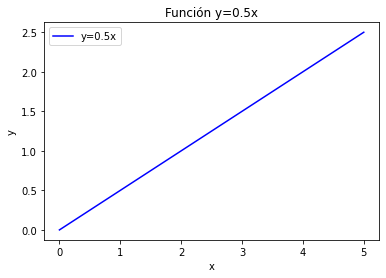

In [7]:
# Primero hay que crear los datos
import numpy as np

x = np.linspace(0,5,num=50)
y1 = 0.5*x

# Importamos matplotlib para graficar
import matplotlib.pyplot as plt
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))
# Agregamos la gráfica
plt.plot(x, y1, color='b', label='y=0.5x')
# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y=0.5x')
# Cuando tenemos una sola línea, legend no hace mucho sentido.
plt.legend(loc='best')

* Podemos agregar más de una línea en un mismo gráfico.

* Vamos a graficar la función $y_2 = \sin(x)$ sobre el mismo gráfico anterior.


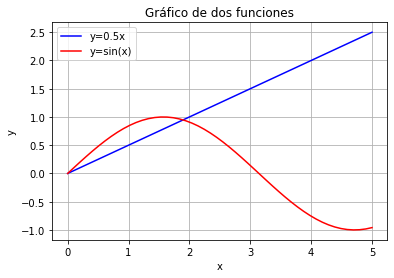

In [8]:
# Hay que crear el vector de la segunda función
y2 = np.sin(x)

# Usamos el mismo código del gráfico anterior, pero agregamos un segundo plot
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))
# Agregamos la 1ra gráfica. En color, la 'b' significa blue.
plt.plot(x, y1, color='b', label='y=0.5x')
# Agregamos la 2da gráfica. Aquí cambiamos el color a rojo.
plt.plot(x, y2, color='r', label='y=sin(x)')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dos funciones')
# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')
# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

* `plot` grafica *líneas continuas*.
* Si queremos graficar *puntos*, usamos la función `scatter`.
* Podemos mezclar los tipos de gráfico en una misma imagen.

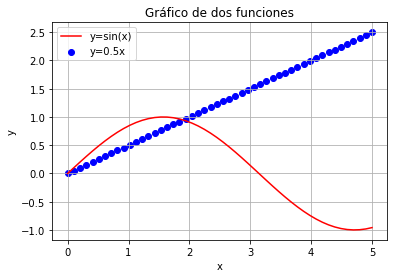

In [9]:
# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))

# Agregamos la 2da gráfica primero. El orden no importa.
plt.plot(x, y2, color='r', label='y=sin(x)')
# Agregamos la 1ra gráfica. Cambiamos a un scatter
plt.scatter(x, y1, color='b', label='y=0.5x')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dos funciones')
# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')
# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

* Cuando trabajamos con datos *tabulares*, en matplotlib tenemos que configurar cada elemento del gráfico y puede resultar en muchas líneas de código.

* Seaborn nos ayuda mucho cuando queremos graficar DataFrames de manera rápida y en menos líneas de código.

## Seaborn
* Para graficar con Seaborn, la tabla debe tener **formato largo**.
* Cada columna debe representar una variable y cada renglón una observación.
* Cuando en las columnas tenemos valores de una variable (por ejemplo, distintos años), la tabla no tiene formato largo.
* La forma general de graficar con Seaborn es:
```python
# Importamos la librería
import seaborn as sns
# Seaborn hace más bonitas las gráficas.
# Usamos set para definir el estilo de Seaborn para todas las gráficas.
sns.set()
# La gráfica en sí:
sns.<tipo_de_grafico>(data = <df>, x=<"columna X">, 
                    y = <"columna y"> , hue = <"columna color">, 
                    size = <"columna tamaño">, style = <'columna estilo'>, 
                    palette = <'paleta de colores'>, cmap,...)
```

* Vamos a cargar el dataset *Iris* y hacer algunas gráficas.

In [10]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [11]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd '/gdrive/MyDrive/SemanaTec/arte-analitica'

/gdrive/MyDrive/SemanaTec/arte-analitica


In [12]:
# Cargamos el dataset
import pandas as pd
import numpy as np

iris = pd.read_csv('data/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Obtenemos las estadísticas de los datos
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Iris dataset
Este famoso conjunto de datos corresopnde a un análisis multivariado que el biólogo Ronald Fisher utilizó en su artículo de 1936 *The use of multiple measurements in taxonomic problems* para ejemplificar un análisis discriminante lineal.

Los datos consisten en 4 mediciones para tres especies de flor Iris (Iris setosa, Iris virginica and Iris versicolor). Las 4 mediciones corresponden a la longitud y altura de los sépalos y de los pétalos de cada especimen.

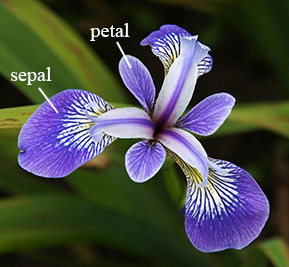

In [14]:
# Importamos seaborn
import seaborn as sns
sns.set()

### Histogramas.

* Los histogramas nos ayudan a visualizar la distribución de **una sola variable numérica**. 

* El eje $x$ está dividido en *secciones* o *cajas*. Este parámetro se llama *bins* en la función de Seaborn.

* El eje $y$ muestra cuántos datos cayeron en cada *caja* en las que se dividió la variable que estamos graficando.

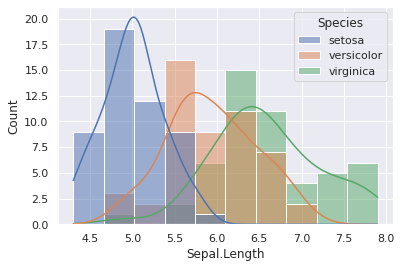

In [15]:
# Graficamos un histograma con histplot. 
# Sólo hay que definir el DF donde tomamos los datos y cuáles columnas queremos graficar.
sns.histplot(data=iris, x='Sepal.Length', hue='Species' , bins=10, kde= True)

* `data`: es la tabla que contiene los datos que vamos a graficar.
* `x`: es la **variable (columna) numérica** a graficar.
* `hue`: controla el color dependiendo de **una variable cualitativa**.
* `bins`: es el número de cajas (barras) que va a tener el histograma. Por defecto son 10.
* `kde`: es un parámetro para graficar una aproximación continua del histograma.

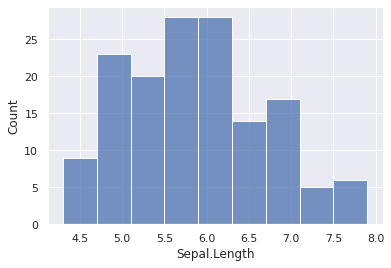

In [16]:
# Histograma simple
sns.histplot(data=iris, x='Sepal.Length')

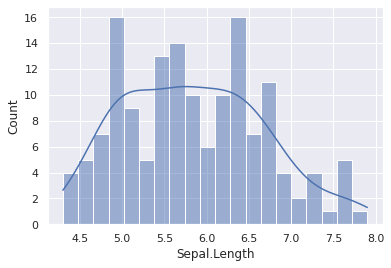

In [17]:
# A medida que agremamos parámetros, vamos controlando el gráfico.
sns.histplot(data=iris, x='Sepal.Length', bins=20, kde=True)

* Por defecto, Seaborn usa el nombre de las columnas para definir las etiquetas de los ejes. 
* Podemos usar las funciones de matplotlib para modificar los elementos del gráfico y el tamaño.

Text(0.5, 1.0, 'Comparación de la distribución del sépalo por especie')

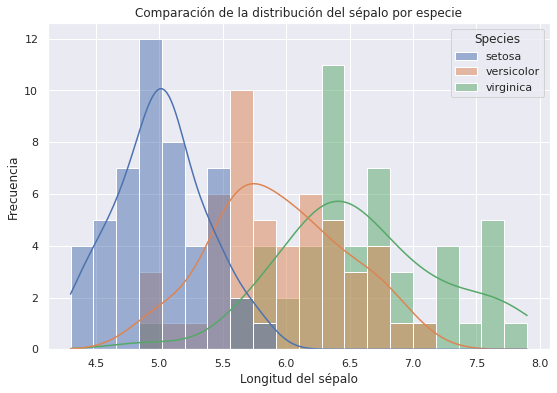

In [18]:
# Cuando agregamos hue, separamos la variable en grupos dependiendo el valor de la variable cualitativa.
# A medida que agremamos parámetros, vamos controlando el gráfico.

# Tamaño de la imagen
fig = plt.figure(figsize=(9,6))

# Gráfico
sns.histplot(data=iris, x='Sepal.Length', hue='Species', bins=20, kde=True)

# Ejes y título
plt.xlabel('Longitud del sépalo')
plt.ylabel('Frecuencia')
plt.title('Comparación de la distribución del sépalo por especie')

### Gráficos de caja (Boxplot)

* Un diagrama de caja (y bigotes) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. 

* Este gráfico es muy útil porque nos permite visualizar de manera rápida estos estadísticos:
  * 1er cuartil
  * 3er cuartil
  * Mediana
  * Máximo y mínimo
  * Valores atípicos.

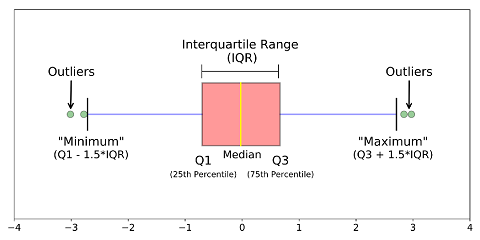

* Cuando graficamos **una sola variable numérica**, el boxplot es parecido a un histograma. Ayuda a ver la distribución de la variable (medida central y de dispersión).

Text(0.5, 1.0, 'Histograma del ancho de sépalo por especie')

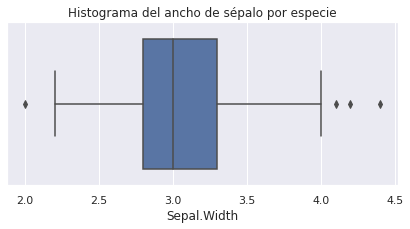

In [19]:
# Tamaño de la imagen
fig = plt.figure(figsize=(7,3))
# Gráfico boxplot
sns.boxplot(data=iris, x='Sepal.Width')
# Ejes y título
plt.title('Histograma del ancho de sépalo por especie')

* Los puntos en el histograma representan **datos atípicos** (outliers). 
* Estos datos presentan valores extremos, es decir, que están muy por encima comparados con el resto de las observaciones.


* El boxplot puede graficar **una variable numérica** separada por **una variable cualitativa**

* A diferencia del histograma, no se empalman la gráficas.

* Ahora, veamos cómo se distribuye el ancho de sépalo por especie. Esta separación la hacemos usando la variable *Species* en el eje y.

Text(0.5, 1.0, 'Histograma del ancho de sépalo por especie')

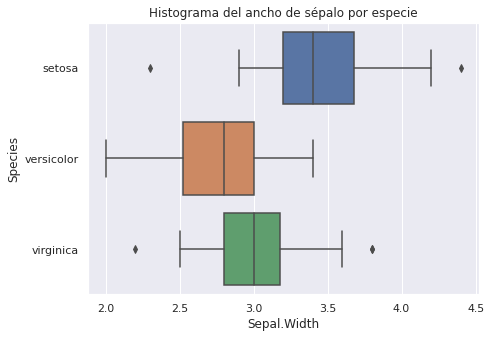

In [20]:
# Tamaño de la imagen
fig = plt.figure(figsize=(7,5))
# Gráfico boxplot
sns.boxplot(data=iris, x='Sepal.Width', y = 'Species')
# Ejes y título
plt.title('Histograma del ancho de sépalo por especie')

* La ventaja de los diagramas de caja es que podemos invertir los ejes dependiendo de cómo se presenten mejor los datos.

* Si la variable categorica que usamos para separar los datos **tiene muchos niveles**, lo recomendable es usarla en el eje *y*.

Text(0, 0.5, 'Ancho del sépalo')

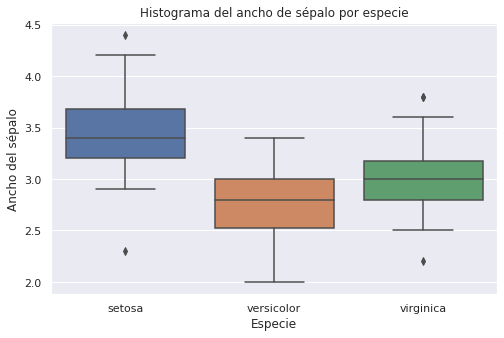

In [21]:
# Tamaño de la imagen
fig = plt.figure(figsize=(8,5))
# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=iris, y='Sepal.Width', x='Species')
# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma del ancho de sépalo por especie')
plt.xlabel('Especie')
plt.ylabel('Ancho del sépalo')

### Mapa de calor (Heatmap)

* Esta técnica de visualización de datos nos muestra la magnitud de una variable que se distribuye en **dos dimensiones**. 
* En esencia, es colorear una **tabla** donde la *intensidad* del color corresponde al *valor* de cada celda. 

* Es muy útil cuando tenemos tablas en formato ancho, donde tenemos valores de variables en las columnas y en las filas. 

* Normalmente, lo utilizamos para visualizar una **matriz de correlación**.

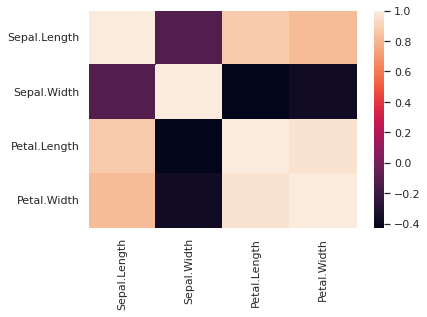

In [42]:
# Vamos a graficar la matriz de correlación del dataset Iris
iris_corr = iris.corr()

# Para graficar el mapa de calor usamos heatmap. No necesitamos especificar x ni y
sns.heatmap(data=iris_corr)

* La barra lateral es el **mapa de color**, que nos muestra la correspondencia del valor de la tabla a un color en específico. 

* Existen diferentes mapas de colores que podemos utilizar, la lista está en la siguiente liga:

  * [Mapas de Color. Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

* Debemos escoger el mapa de color y la escala correcta dependiendo de los datos.

* Sabemos que la correlación va de -1 a 1. Esta es nuestra escala.

* Nos interesa saber si la correlacióne es positiva o negativa, nos conviene un mapa **divergente**.

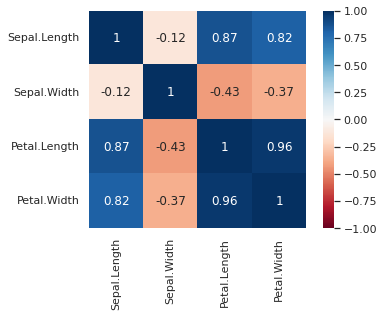

In [43]:
# Gráfico heatmap. Seleccionamos los valores extremos con vmin y vmax.
# El mapa de color que usaremos es de un extremo azul y del otro rojo.
# Con annot podemos desplegar el valor de cada celda
# Con square hacemos que el gráfico sea simétrico en tamaño de ejes
sns.heatmap(data=iris_corr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

### Gráficos de barra

* Esta visualización la usamos cuando queremos graficar los valores de una **variable categórica**. 

* Es el equivalente al *conteo* de las apariciones de cada clase de la variable categórica.

* Con Seaborn, python hace el conteo automáticamente.

Text(0, 0.5, 'Frecuencia')

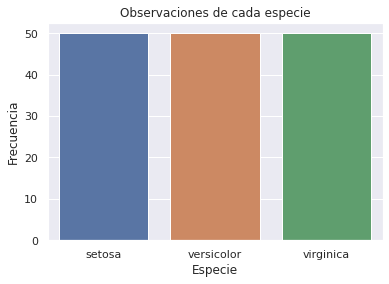

In [24]:
# Vamos a graficar el conteo de la variable categórica (Species)
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada especie.
sns.countplot(data=iris, x = 'Species')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada especie')
plt.xlabel('Especie')
plt.ylabel('Frecuencia')

* Al igual que el boxplot, podemos invertir los ejes si nos conviene. 

* Si hay muchas categorías, lo mejor es tenerlas en el eje Y.

Text(0, 0.5, 'Especie')

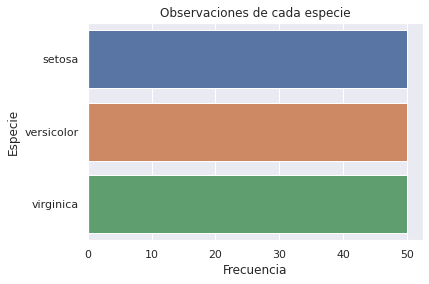

In [25]:
# Vamos a graficar el conteo de la variable categórica (Species)
# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico countplot para hacer barras con el número de apariciones de cada especie.
sns.countplot(data=iris, y = 'Species')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Observaciones de cada especie')
plt.xlabel('Frecuencia')
plt.ylabel('Especie')

### Gráfico de dispersión (scatterplot).
* Los usamos cuando queremos ver la relación entre **dos variables numéricas**.

* Podemos usar variables categóricas para modificar el estilo o el color de cada punto.

* Es más rápido usar esta función que con matplotlib.



Text(0, 0.5, 'Ancho del sépalo')

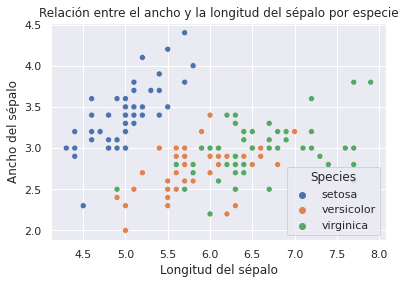

In [26]:
# Vamos a graficar la relación entre el ancho y la longitud del sépalo.

# Tamaño de la imagen
fig = plt.figure(figsize=(6,4))

# Gráfico scatterplot. 
sns.scatterplot(data=iris, x = 'Sepal.Length', y='Sepal.Width', hue='Species')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre el ancho y la longitud del sépalo por especie')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

* Si queremos visualizar la relación uno a uno entre todas las variables numéricas, podemos usar la función *pairplot*.

* La estructura es similar a la matriz de correlación.

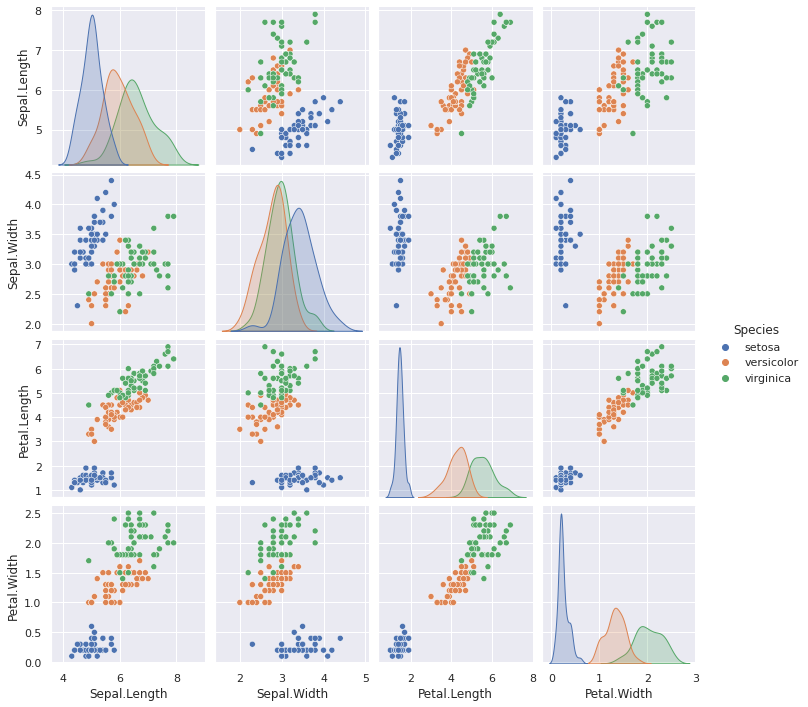

In [27]:
# Pairplot es una versión más compleja y grande del gráfico de dispersión.
sns.pairplot(data=iris, hue='Species')

# Actividad

- **Nombres**: Santiago Andrés Serrano Vacca, Miguel Ángel Peña Ruiz, Ricardo Jorge Rodríguez Treviño, David Emiliano Mireles Cárdenas
- **Matrículas**: A01734988, A01366731, A00831595, A01633729

## Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

## Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Amazon bestsellers

El dataset `bestsellers with categories` es una tabla que contiene el top 50 de los libros más vendidos por Amazon en cada año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* Name: nombre del libro
* Author: autor
* User Rating: calificación promedio que los usuarios asignaron al libro (1-5).
* Reviews: número de reseñas
* Price: precio del libro
* Year: año de publicación
* Genre: género literario (ficción/no ficción)


Los datos están en el archivo `best sellers with categories.csv` dentro de la carpeta `data`.

In [28]:
# Carga las librerías
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [29]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/gdrive')

# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd '/gdrive/MyDrive/SemanaTec/arte-analitica'

# Carga los datos y muestra los primeros renglones
bests = pd.read_csv('data/bestsellers with categories.csv')
bests.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/SemanaTec/arte-analitica


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [30]:
# Haz un resumen estadístico de la tabla
bests.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0, 0.5, 'Publicaciones')

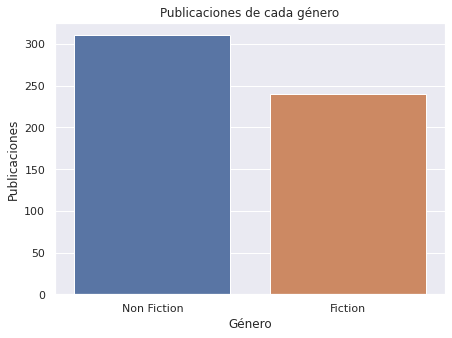

In [41]:
# ¿Cual es el género con más publicaciones? Muéstralo en un gráfico.
fig = plt.figure(figsize=(7,5))
sns.countplot(data=bests, x = 'Genre')
plt.title('Publicaciones de cada género')
plt.xlabel('Género')
plt.ylabel('Publicaciones')

Text(0, 0.5, 'Publicaciones')

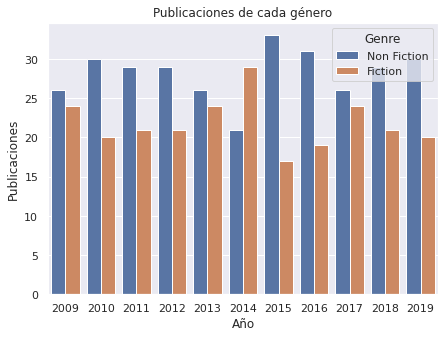

In [47]:
# 'Cuántos libros del top 50 se publicaron cada año por género?
# ¿hay algún año donde hubo más libros de ficción en el top 50?
fig = plt.figure(figsize=(7,5))
sns.countplot(data=bests, x = 'Year', hue = 'Genre')
plt.title('Publicaciones de cada género')
plt.xlabel('Año')
plt.ylabel('Publicaciones')

Text(0, 0.5, 'Cantidad')

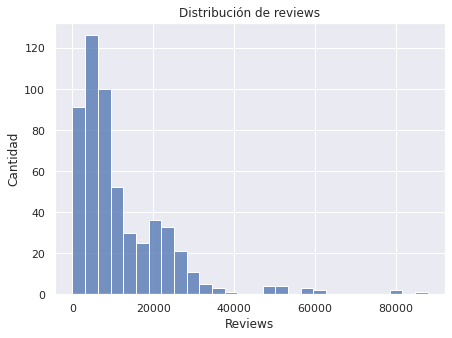

In [48]:
# ¿Cómo se distribuye la variable de Reseñas? 
fig = plt.figure(figsize=(7,5))
sns.histplot(data=bests, x = 'Reviews')
plt.title('Distribución de reviews')
plt.xlabel('Reviews')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Género')

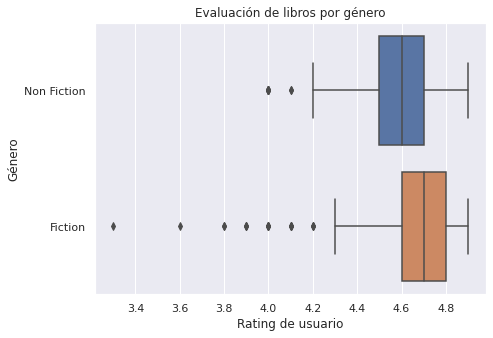

In [52]:
# ¿Cómo se compara la evaluación del libro por género? Muéstralo en un gráfico
# ¿Qué genero es mejor evaluado por los lectores?
fig = plt.figure(figsize=(7,5))
sns.boxplot(data=bests, x = 'User Rating', y = 'Genre')
plt.title('Evaluación de libros por género')
plt.xlabel('Rating de usuario')
plt.ylabel('Género')

Text(0, 0.5, 'Precio')

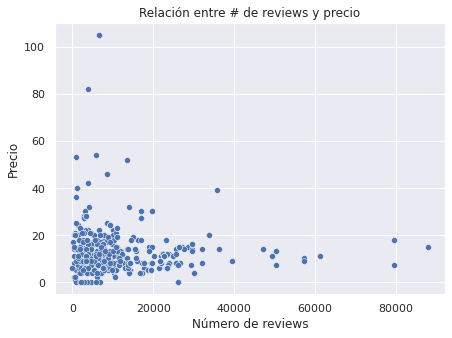

In [53]:
# Cuál es la relación entre el número de reseñas y el precio?
fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=bests, x = 'Reviews', y = 'Price')
plt.title('Relación entre # de reviews y precio')
plt.xlabel('Número de reviews')
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

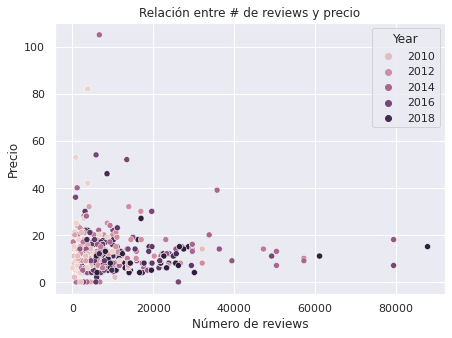

In [55]:
# De la pregunta anterior, ¿influye en algo el año de publicación?
# ¿Cuál es la relación entre el número de reseñas,el precio y el año de publicación?
# Nota: selecciona una paleta de colores adecuada
fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=bests, x = 'Reviews', y = 'Price', hue = 'Year')
plt.title('Relación entre # de reviews y precio')
plt.xlabel('Número de reviews')
plt.ylabel('Precio')

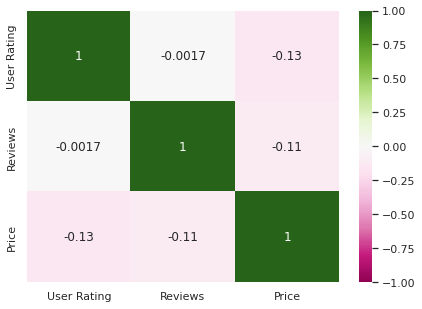

In [68]:
# ¿Cuál es la correlación en las variables numéricas? Muéstralo en un gráfico
# La variable año, a pesar de ser numérica, la vamos a considerar como cualitativa.
# La eliminamos del análisis.
fig = plt.figure(figsize=(7,5))
sns.heatmap(data=bests.drop(columns=["Year", "Name", "Author", "Genre"]).corr(), vmin=-1, vmax=1, center=0, cmap='PiYG', annot=True)

¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?  (Esta pregunta no es de código).


**Ninguna variable tiene una relación fuerte con ninguna otra diferente.**

<Figure size 504x360 with 0 Axes>

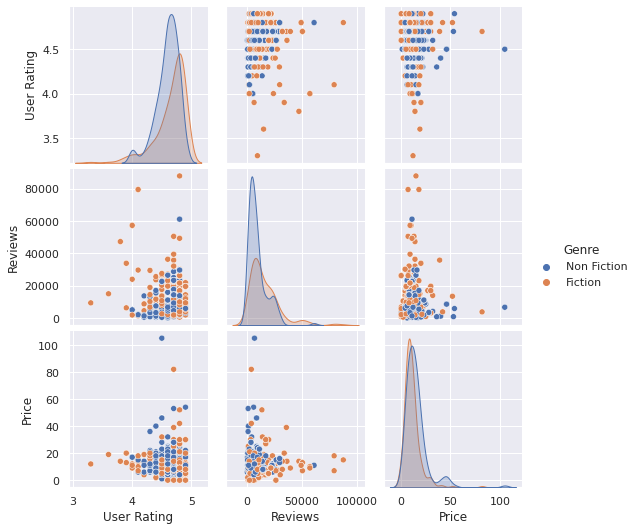

In [74]:
# Haz una gráfica donde pueda compararse la relación entre las tres variables numéricas
# (User Rating, Reviews y Price) y además podamos ver el efecto del género del libro.

# La variable año, a pesar de ser numérica, la vamos a considerar como cualitativa.
# La eliminamos del análisis.
fig = plt.figure(figsize=(7,5))
sns.pairplot(data=bests.drop(columns='Year'), hue='Genre')